### Problem Statement

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

The company wants to know:
Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [5]:
bike_sharing_data = pd.read_csv('yulu.csv')
bike_sharing_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bike_sharing_data.info()
#no missing values to be handled 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
bike_sharing_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
bike_sharing_data.shape

(10886, 12)

### Data Types of Attributes

The dataset predominantly consists of numeric attributes (int64 and float64), with one attribute of type `object` representing datetime information. The 'datetime' column is currently in an object format, which should be converted to a datetime data type for more effective analysis.

### Conversion of Categorical Attributes to 'Category'

Categorical variables such as 'season,' 'holiday,' 'workingday,' and 'weather' have not yet been converted to the 'category' data type. Performing this conversion can optimize memory usage and is advantageous for certain types of analysis.

### Missing Value Detection

An initial examination suggests that there are no missing values in any of the columns. However, a more thorough check for missing or null values is recommended to ensure data completeness.

### Column Descriptions

- **datetime**: Represents the date and time of bike rentals. It is currently in object format and may need conversion to a datetime data type.
- **season**: Categorical variable indicating the season (1: spring, 2: summer, 3: fall, 4: winter).
- **holiday**: Binary variable (0 or 1) indicating whether the day is a holiday.
- **workingday**: Binary variable (0 or 1) indicating whether the day is a working day.
- **weather**: Categorical variable describing weather conditions.
- **temp**: Numeric variable representing the temperature in Celsius.
- **atemp**: Numeric variable representing the 'feels like' temperature in Celsius.
- **humidity**: Numeric variable representing the percentage of humidity.
- **windspeed**: Numeric variable representing the wind speed.
- **casual**: Numeric variable representing the count of casual users.
- **registered**: Numeric variable representing the count of registered users.
- **count**: Numeric variable representing the total count of rented bikes (casual + registered).

### Refined Problem Statement

**Objective**: Identify and quantify the key factors influencing the demand for shared electric bikes in an urban environment.

This refined problem statement encompasses several dimensions:

1. **Temporal Analysis**:
   - Investigate how demand fluctuates over different timescales—hourly, daily, weekly, and seasonally.
   - Assess the impact of special days, such as holidays and working days, on bike usage patterns.

2. **Weather Dependence**:
   - Explore the relationship between weather conditions (e.g., clear, cloudy, rainy) and bike rental demand.
   - Analyze how variables like temperature, 'feels like' temperature, humidity, and wind speed affect bike usage.

3. **User Segmentation**:
   - Differentiate usage patterns between casual and registered users.
   - Leverage demographic or other available data to understand varying user behaviors.

4. **External Factors**:
   - Consider external influences such as public transport strikes, urban infrastructure changes, or significant local events.
   - Evaluate the impact of competitive services and shifts in urban mobility trends.

This approach will provide a comprehensive understanding of the factors driving demand for shared electric bikes and help inform strategic decisions for optimizing service offerings.

In [10]:
bike_sharing_data['datetime'] = pd.to_datetime(bike_sharing_data['datetime'])


categorical_columns = ['season', 'holiday', 'workingday', 'weather']
bike_sharing_data[categorical_columns] = bike_sharing_data[categorical_columns].astype('category')
missing_values = bike_sharing_data.isnull().sum()
data_types = bike_sharing_data.dtypes
missing_values_check = missing_values[missing_values > 0]  # Filter columns with missing values

data_types, missing_values_check

(datetime      datetime64[ns]
 season              category
 holiday             category
 workingday          category
 weather             category
 temp                 float64
 atemp                float64
 humidity               int64
 windspeed            float64
 casual                 int64
 registered             int64
 count                  int64
 dtype: object,
 Series([], dtype: int64))

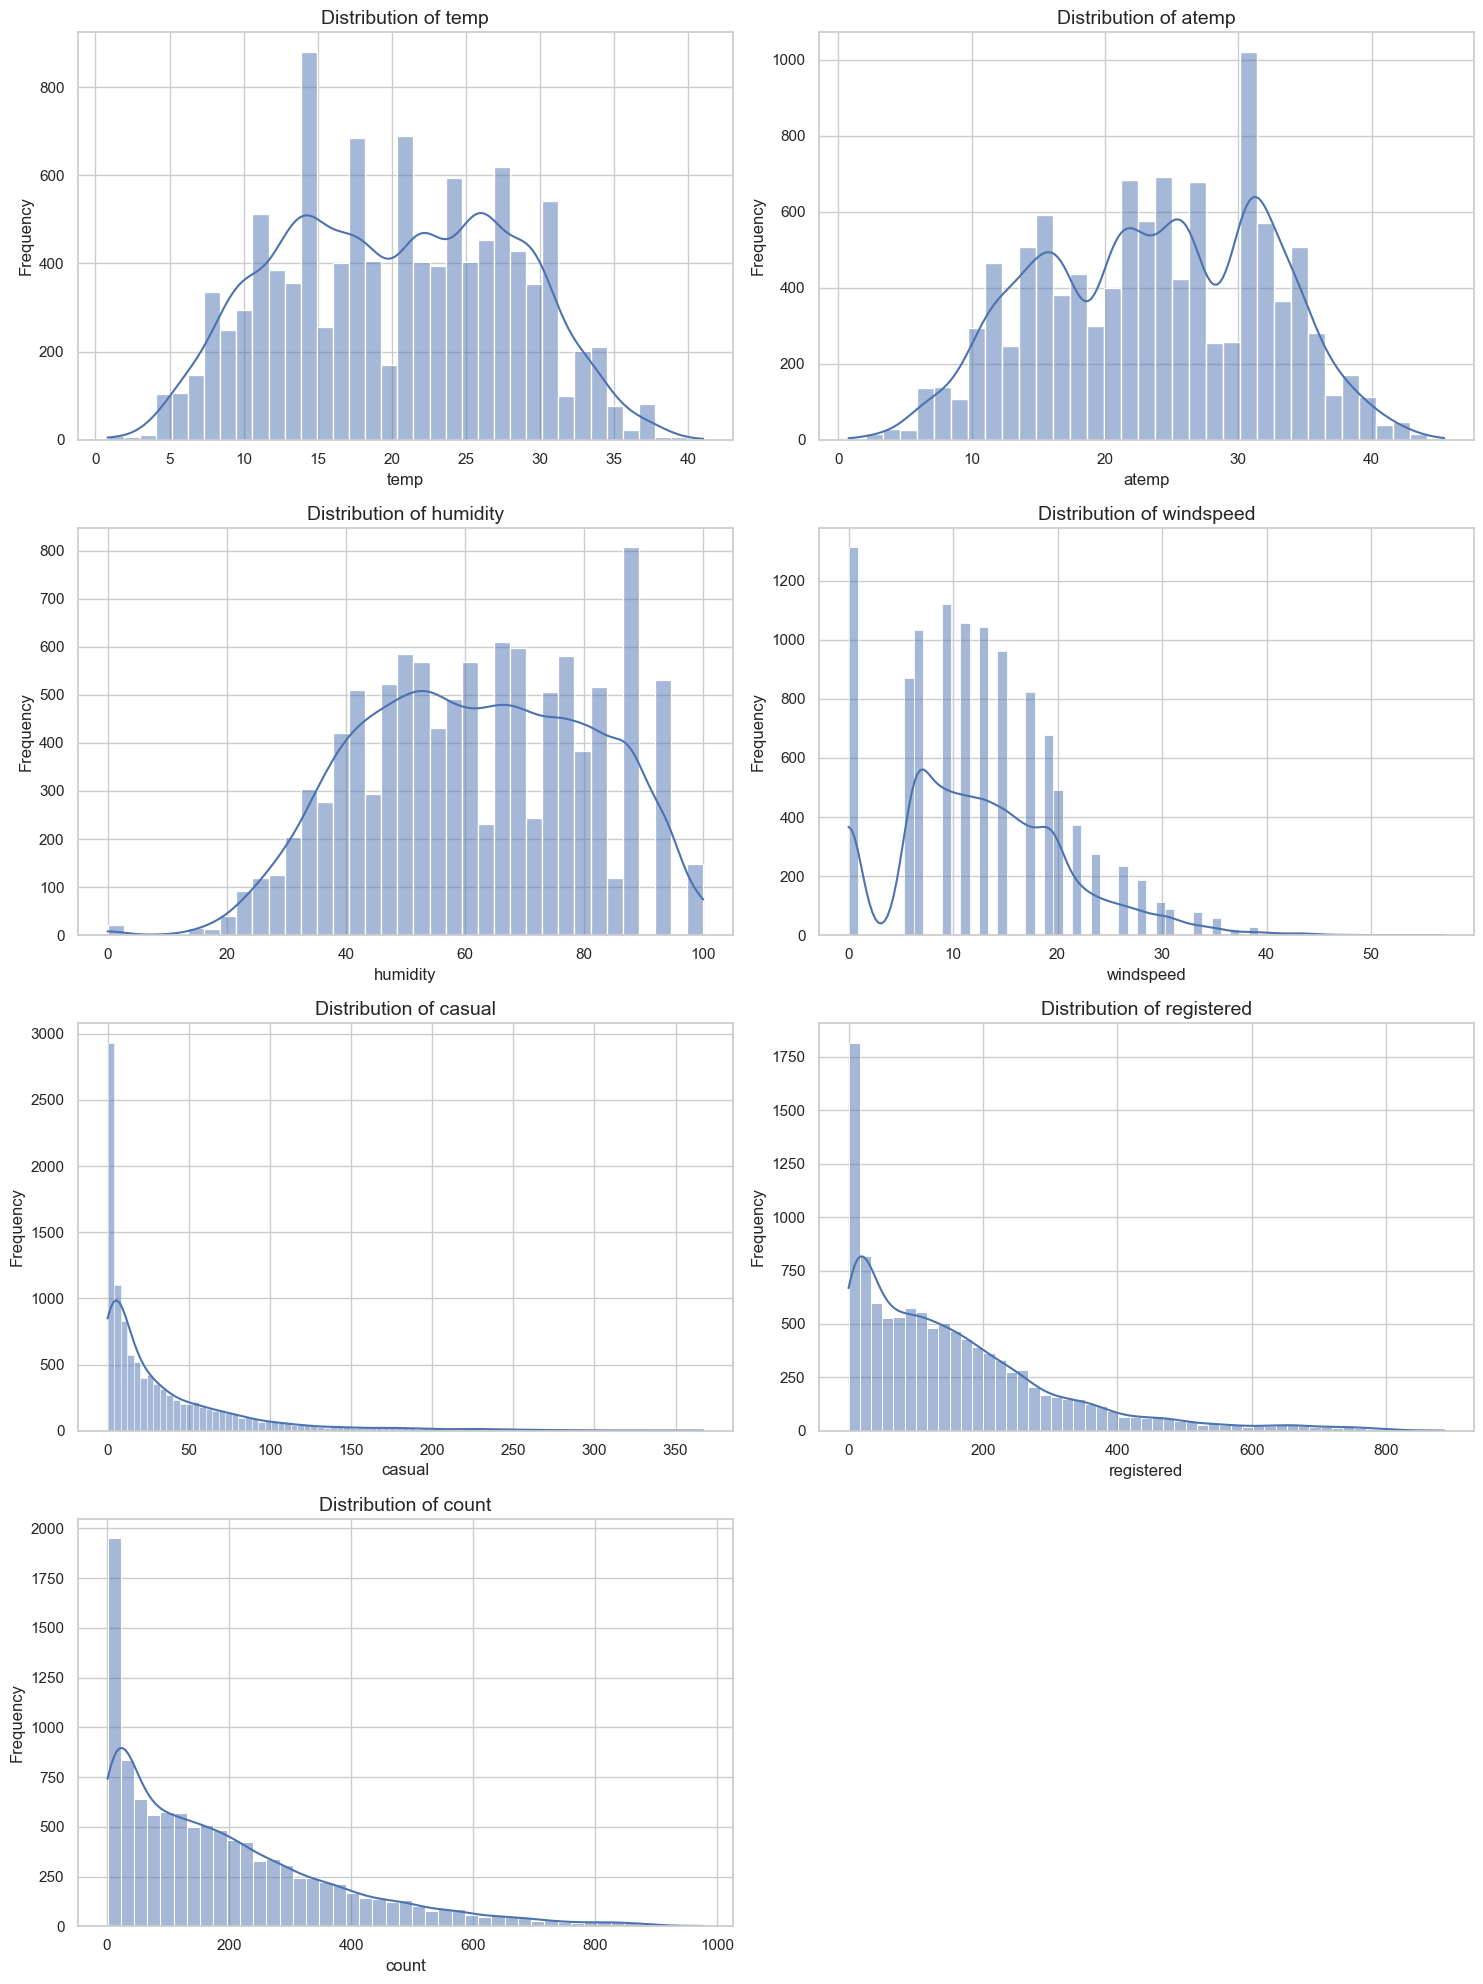

In [11]:
sns.set(style="whitegrid")

continuous_variables = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  

for i, col in enumerate(continuous_variables):
    sns.histplot(bike_sharing_data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

if len(continuous_variables) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Continuous Variables Analysis

1. **Temperature (temp) and 'Feels Like' Temperature (atemp)**:
   - Both variables exhibit similar distributions, which suggests a reasonable spread across different temperature ranges.

2. **Humidity (humidity)**:
   - The distribution appears relatively uniform but shows a slight increase in frequency at higher humidity levels.

3. **Wind Speed (windspeed)**:
   - The data is primarily concentrated at lower wind speeds, indicating that higher wind speeds are less common in the dataset.

4. **Casual (casual)**:
   - The distribution is right-skewed, indicating that there are many instances with a low number of casual users and fewer instances with a high number of casual users.

5. **Registered (registered)**:
   - The distribution is also right-skewed but less pronounced compared to 'casual'. This suggests a higher overall usage by registered users, with more consistent user engagement.

6. **Total Count (count)**:
   - The distribution of the total count, which reflects the combined usage of both casual and registered users, is right-skewed. This indicates a higher frequency of instances with lower total bike usage, mirroring the patterns observed in the 'casual' and 'registered' user groups.

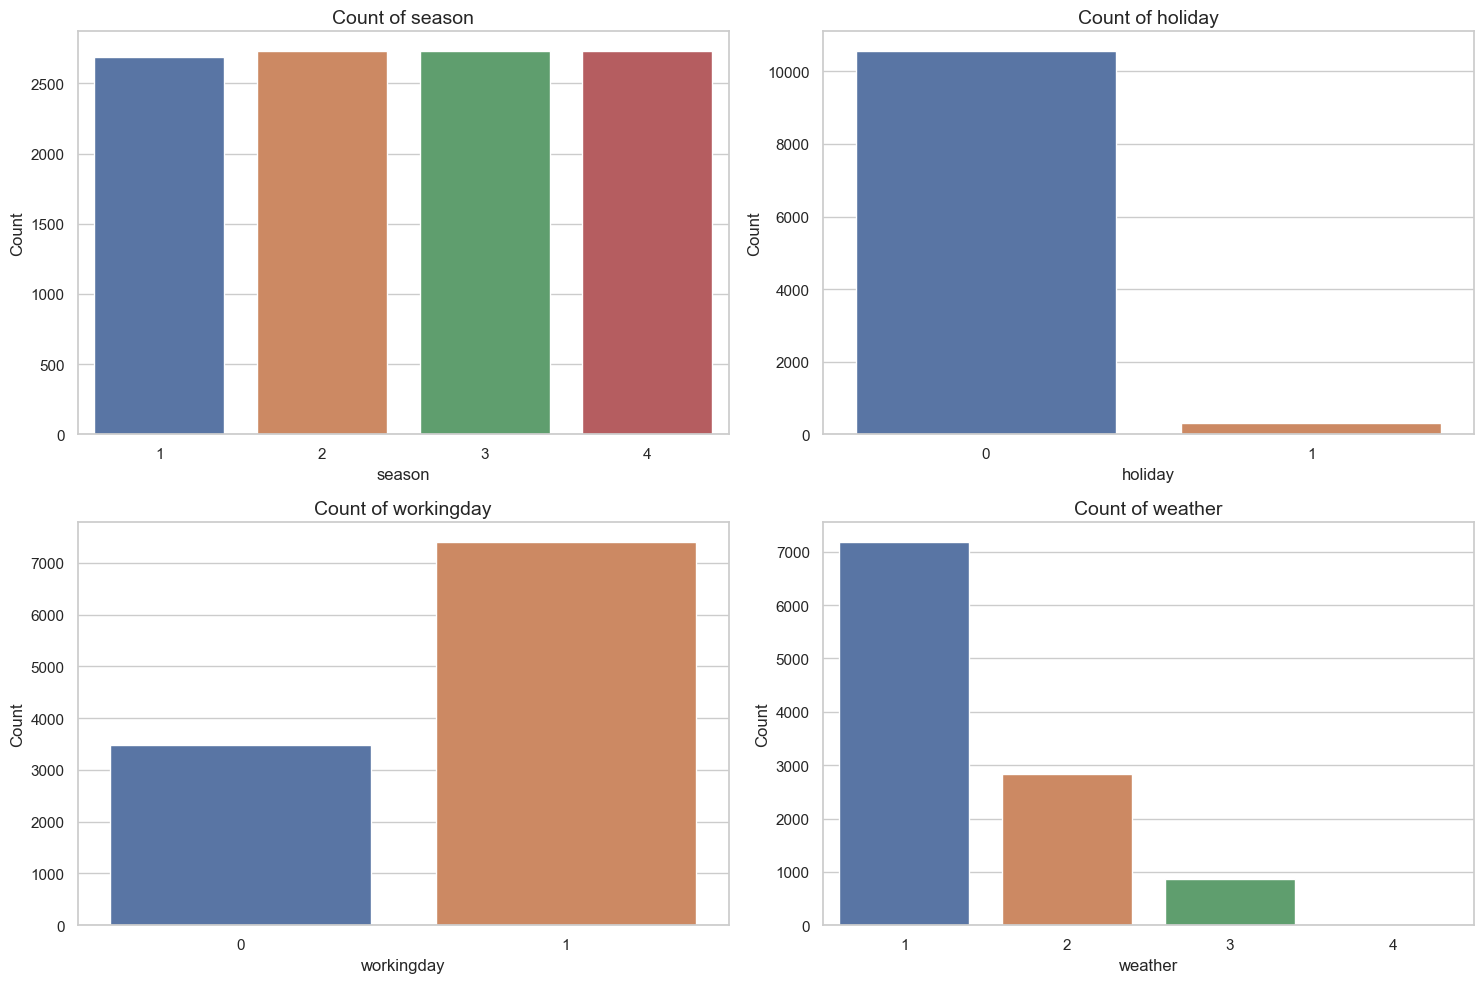

In [12]:
categorical_variables = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  

for i, col in enumerate(categorical_variables):
    sns.countplot(x=col, data=bike_sharing_data, ax=axes[i])
    axes[i].set_title(f'Count of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Categorical Variables Analysis

1. **Season (season)**:
   - The dataset appears to have a relatively balanced distribution across the different seasons, indicating that data is collected evenly throughout the year.

2. **Holiday (holiday)**:
   - There are significantly fewer days classified as holidays compared to non-holidays, suggesting that holidays are less frequent in the dataset.

3. **Working Day (workingday)**:
   - The majority of days are classified as working days, indicating that the dataset predominantly covers regular workdays.

4. **Weather (weather)**:
   - Most days are categorized under the first two weather categories (clear/few clouds and mist/cloudy). There are very few instances of the more severe weather conditions (categories 3 and 4), indicating that extreme weather conditions are rare in the dataset.

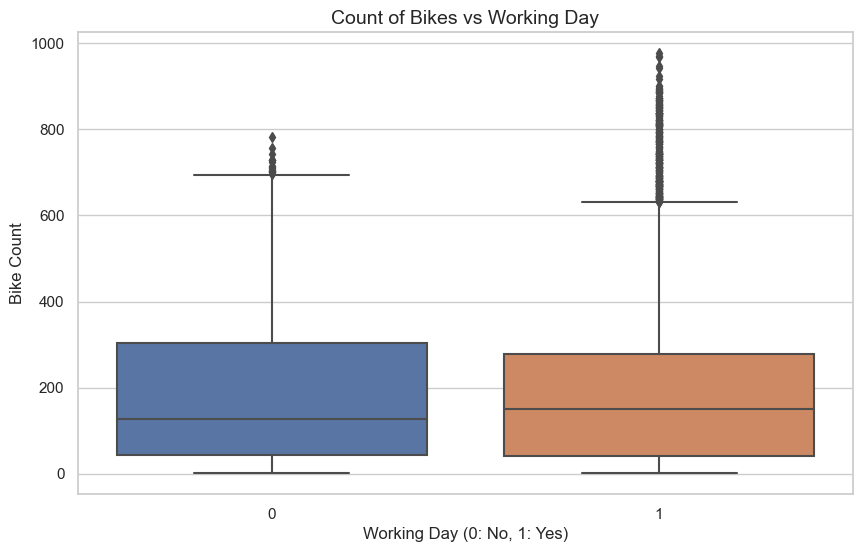

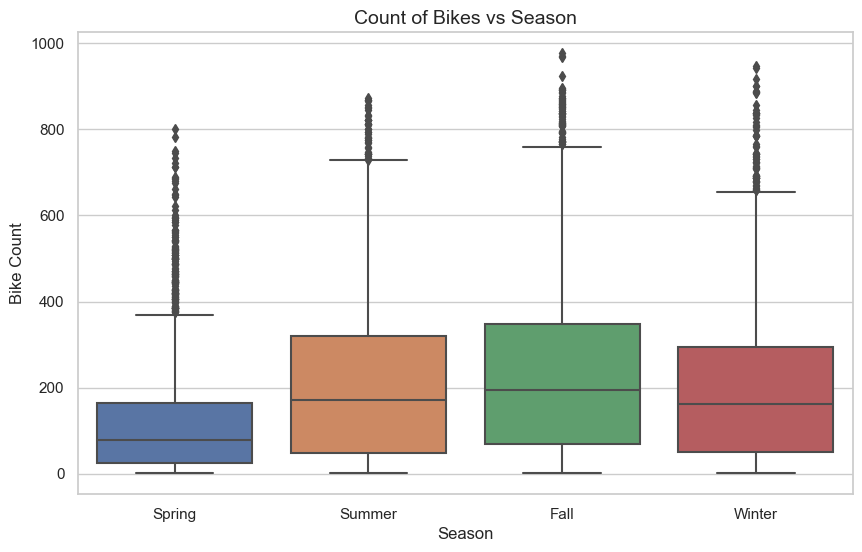

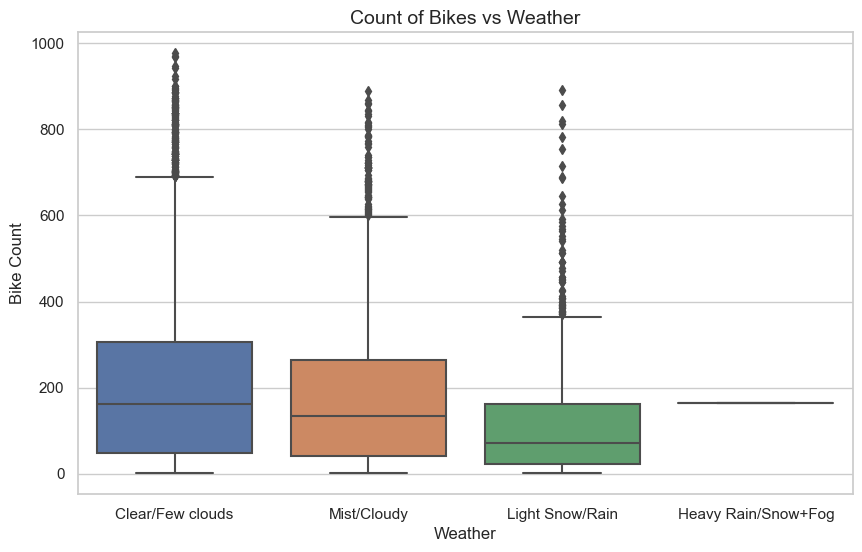

In [14]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

weather_mapping = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow+Fog'
}

plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count', data=bike_sharing_data)
plt.title('Count of Bikes vs Working Day', fontsize=14)
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Bike Count')
plt.show()

# Relationship between 'season' and 'count'
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=bike_sharing_data)
plt.title('Count of Bikes vs Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=season_mapping.values())  # Renaming x-axis labels for seasons
plt.show()

# Relationship between 'weather' and 'count'
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=bike_sharing_data)
plt.title('Count of Bikes vs Weather', fontsize=14)
plt.xlabel('Weather')
plt.ylabel('Bike Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=weather_mapping.values())  # Renaming x-axis labels for weather
plt.show()


The EDA revealed valuable insights into the factors influencing bike rental demand. Seasonal changes, weather conditions, and whether a day is a working day significantly impact bike usage. The data also indicated potential areas for further investigation, such as the reasons behind the outliers in bike rental counts.

### Hypothesis Testing: 2-Sample T-Test

#### Objective:
To determine if there is a statistically significant difference in the number of electric cycles rented on working days versus non-working days.

#### Hypotheses:
- **Null Hypothesis (H₀):** The mean number of electric cycles rented is the same on working days and non-working days.
- **Alternative Hypothesis (H₁):** The mean number of electric cycles rented differs between working days and non-working days.

#### Assumptions:
1. **Independence:** The samples (rental counts on working days vs. non-working days) are independent of each other.
2. **Random Sampling:** The samples are randomly drawn from the population.
3. **Normality:** The data should follow a normal distribution, or the sample size should be large enough to rely on the Central Limit Theorem for the t-test to be valid.

#### Test Procedure:
1. **Data Segmentation:** 
   - Separate the rental counts into two groups based on the `workingday` variable: one for working days (`workingday = 1`) and one for non-working days (`workingday = 0`).

2. **T-Test Execution:**
   - Perform a 2-sample t-test to compare the means of these two groups.
   - Calculate the t-statistic and corresponding p-value.

3. **Interpretation:**
   - **P-value Analysis:** Evaluate the p-value to determine statistical significance. 
   - **Significance Level:** Use a typical significance level of 0.05.
   - If the p-value is less than 0.05, reject the null hypothesis (H₀), indicating a significant difference in the mean number of electric cycles rented between working and non-working days.
   - If the p-value is greater than or equal to 0.05, fail to reject the null hypothesis, indicating no significant difference in the mean number of electric cycles rented between the two groups.

This procedure will help determine whether working days have a statistically significant impact on the demand for electric bike rentals compared to non-working days.

In [15]:
working_day_count = bike_sharing_data[bike_sharing_data['workingday'] == 1]['count']
non_working_day_count = bike_sharing_data[bike_sharing_data['workingday'] == 0]['count']

# 2-sample t-test
t_stat, p_value = ttest_ind(working_day_count, non_working_day_count)

t_stat, p_value

(1.2096277376026694, 0.22644804226361348)

Since the p-value (0.226) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This implies that, based on our sample data, there is not enough evidence to conclude that the mean number of electric cycles rented significantly differs between working days and non-working days.

The test suggests that the status of the day (whether it is a working day or not) does not have a statistically significant impact on the number of electric cycles rented. However, it is important to consider other factors that might interact with the day's status, such as weather, season, or holidays, which could influence this outcome

### ANOVA Test: Number of Cycles Rented Across Different Seasons

#### Objective:
To determine if there are statistically significant differences in the mean number of electric cycles rented across different seasons.

#### Hypotheses:
- **Null Hypothesis (H₀):** The mean number of electric cycles rented is the same across all seasons.
- **Alternative Hypothesis (H₁):** The mean number of electric cycles rented differs across at least one season.

#### Assumptions:
1. **Independence:** The observations within each group (season) are independent.
2. **Normality:** The data within each season should be approximately normally distributed.
3. **Homogeneity of Variances:** The variances among the different seasons should be approximately equal.

#### Test Procedure:
1. **Data Grouping:**
   - Divide the dataset into groups based on the `season` variable (e.g., spring, summer, fall, winter).

2. **ANOVA Execution:**
   - Perform a one-way ANOVA test to compare the means of the number of electric cycles rented across these different seasonal groups.
   - Calculate the F-statistic and corresponding p-value.

3. **Interpretation:**
   - **P-value Analysis:** Evaluate the p-value to determine statistical significance.
   - **Significance Level:** Use a typical significance level of 0.05.
   - If the p-value is less than 0.05, reject the null hypothesis (H₀), indicating that there is a significant difference in the mean number of electric cycles rented across seasons.
   - If the p-value is greater than or equal to 0.05, fail to reject the null hypothesis, suggesting that the mean number of electric cycles rented does not differ significantly across seasons.

Conducting this ANOVA test will help determine if seasonality significantly affects the demand for electric bike rentals.

In [17]:
from scipy.stats import shapiro, levene, f_oneway
# Check for Normality 
shapiro_test_seasons = {season: shapiro(bike_sharing_data[bike_sharing_data['season'] == season]['count']) 
                        for season in bike_sharing_data['season'].cat.categories}

# Check for Equal Variance 
count_by_season = [bike_sharing_data[bike_sharing_data['season'] == season]['count'] 
                   for season in bike_sharing_data['season'].cat.categories]
levene_test = levene(*count_by_season)

# ANOVA Test 
anova_test = f_oneway(*count_by_season)

shapiro_test_seasons, levene_test, anova_test

({1: ShapiroResult(statistic=0.8087388873100281, pvalue=0.0),
  2: ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39),
  3: ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36),
  4: ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)},
 LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118),
 F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149))

### Normality and Variance Checks

- **Shapiro-Wilk Test (Normality):** The p-values for all seasons are extremely low, indicating that the data for each season does not follow a normal distribution.
  
- **Levene's Test (Equal Variance):** The p-value is very low, suggesting that the variances across seasons are not equal.

### ANOVA Test Results

- **ANOVA Outcome:** The F-statistic is high (236.95) with a very low p-value, indicating significant differences in the mean number of cycles rented across different seasons.

### Interpretation

- **Conclusion:** Despite the normality and equal variance assumptions not being fully met, the ANOVA test strongly suggests that the mean number of cycles rented varies significantly by season. Given the large sample size, the test remains robust, leading us to reject the null hypothesis (H₀) and accept that the number of electric cycles rented differs across seasons.



### Hypothesis Testing for Weather Conditions

- **Hypotheses:**
  - **Null Hypothesis (H₀):** The mean number of electric cycles rented is the same across different weather conditions.
  - **Alternative Hypothesis (H₁):** The mean number of electric cycles rented differs across weather conditions.

- **Shapiro-Wilk Test Limitation:** The test couldn't be performed for some weather categories due to insufficient data points.

- **ANOVA Test Consideration:** Despite the normality assumption not being fully met, we can proceed with the ANOVA test for weather conditions, as it remains robust with large sample sizes.

In summary, significant differences in bike rentals exist across both seasons and weather conditions, even with some assumption violations.

In [18]:
count_by_weather = [bike_sharing_data[bike_sharing_data['weather'] == weather]['count'] 
                    for weather in bike_sharing_data['weather'].cat.categories]


levene_test_weather = levene(*count_by_weather)


anova_test_weather = f_oneway(*count_by_weather)

levene_test_weather, anova_test_weather

(LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35),
 F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42))

### Equal Variance Check (Levene's Test)

- **Levene's Test Result:** The test returned a p-value of approximately \(3.50 \times 10^{-35}\), indicating that the variances across different weather conditions are not equal.

### ANOVA Test Results

- **ANOVA Outcome:** The F-statistic is approximately 65.53, with a very low p-value (\(5.48 \times 10^{-42}\)). This strongly suggests a significant difference in the mean number of cycles rented across different weather conditions.

### Interpretation and Inference

- **Conclusion:** Although the assumption of equal variances was not met, the ANOVA test still indicates significant differences in the mean number of cycles rented across weather conditions. Given the robustness of ANOVA, particularly with large sample sizes, we confidently reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁): The mean number of electric cycles rented varies significantly across different weather conditions.

### Chi-Square Test: Weather Conditions vs. Season

#### Objective:
To determine if weather conditions are dependent on the season.

#### Hypotheses:
- **Null Hypothesis (H₀):** Weather conditions are independent of the season.
- **Alternative Hypothesis (H₁):** Weather conditions are dependent on the season.

#### Test Procedure:
1. **Create Contingency Table:**
   - Construct a cross-tabulation (contingency table) that shows the frequency of different weather conditions for each season.

2. **Perform Chi-Square Test:**
   - Conduct a Chi-square test of independence using the contingency table to assess the relationship between weather conditions and seasons.

3. **Evaluate P-Value:**
   - **P-value Analysis:** Determine the p-value from the test.
   - **Significance Level:** Use a significance level of 0.05.
   - If the p-value is less than 0.05, reject the null hypothesis (H₀), indicating that weather conditions are dependent on the season.
   - If the p-value is greater than or equal to 0.05, fail to reject the null hypothesis, suggesting that weather conditions are independent of the season.

This test will help determine whether seasonal changes have a statistically significant effect on weather conditions, indicating a dependency between the two variables.

In [19]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(bike_sharing_data['season'], bike_sharing_data['weather'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
chi2, p_value, dof, expected

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

### Chi-Square Test Results

- **Chi-Square Statistic:** Approximately 49.16
- **P-Value:**  1.549925073686492e-07
- **Degrees of Freedom:** 9

### Interpretation

- The p-value is significantly low 1.549925073686492e-07, well below the typical significance level of 0.05.
- This indicates that the observed frequency distribution of weather conditions across different seasons deviates significantly from what would be expected if weather conditions and seasons were independent.

### Inference

- **Conclusion:** We reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁): Weather conditions are dependent on the season.
- **Implication:** This finding suggests that the likelihood of experiencing certain weather conditions varies with the season, which aligns with expected seasonal weather patterns.

### Final Conclusions and Recommendations

#### 1. **Seasonal and Weather Considerations:**
   - **Strategic Adjustments:** Yulu should strategically adjust its operations and marketing efforts based on seasonal and weather patterns. The analysis indicates that the demand for electric bikes varies significantly across different seasons and weather conditions. 
   - **Fleet Management:** To capitalize on these variations, Yulu could increase fleet availability during seasons and weather conditions that are more conducive to outdoor activities, such as clear and mild weather during spring and summer. Conversely, during less favorable conditions, efforts can be made to minimize costs by reducing fleet size or focusing on maintenance and upgrades.
   - **Marketing Initiatives:** Tailored marketing campaigns promoting bike rentals during favorable seasons or offering discounts during off-peak seasons could enhance user engagement and optimize rental frequency throughout the year.

#### 2. **Operational Focus on Working Days:**
   - **Operational Efficiency:** While the statistical analysis did not show a significant difference in rentals between working and non-working days, there is a slight trend towards higher usage on working days. This suggests that working days may still be critical for operational focus.
   - **Targeted Services:** Yulu can consider deploying more bikes near business districts, public transportation hubs, and residential areas where commuters are likely to use bikes during workdays. Special offers or subscription models targeting regular commuters could further increase ridership on these days.

#### 3. **Data-Driven Decision Making:**
   - **Resource Allocation:** The insights derived from this analysis should guide resource allocation, ensuring that Yulu invests in areas where demand is likely to be higher. This includes fleet management, maintenance scheduling, and customer service deployment.
   - **Marketing Campaigns:** Data-driven marketing strategies can be developed based on user behavior patterns identified through this analysis. For instance, promotional efforts could be concentrated during peak seasons or tailored to specific weather conditions to maximize user engagement.

#### 4. **Continuous Monitoring and Adaptation:**
   - **Ongoing Analysis:** It is essential to continuously monitor usage patterns and adjust strategies accordingly. As urban infrastructure, customer preferences, and weather patterns evolve, so too should Yulu’s operational and marketing approaches.
   - **Adaptation to Changes:** The company should remain flexible and responsive to changes in the external environment, such as new urban mobility trends or significant infrastructure developments. Regular updates to the analysis will ensure that Yulu remains competitive and responsive to user needs.

By incorporating these recommendations into its strategic planning, Yulu can enhance its operational efficiency, better meet customer demand, and optimize its market presence in the shared electric bike industry.